<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [53]:
df = pd.read_csv(file_name)
#df.head()
df.columns
df.dtypes

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [6]:
# your code goes here
import matplotlib as mpl
import matplotlib.pyplot as plt


In [7]:
import numpy as np

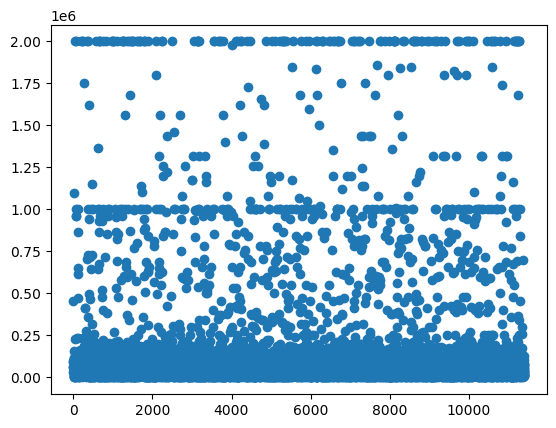

In [12]:
plt.scatter(df['ConvertedComp'].index,df['ConvertedComp'])
plt.show()

Plot the histogram for the column `ConvertedComp`.


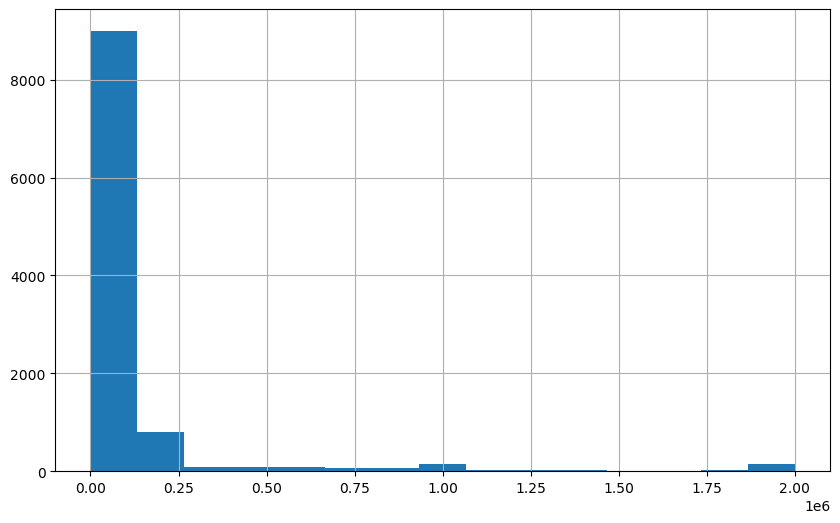

In [13]:
# your code goes here
df['ConvertedComp'].hist(bins=15,figsize=(10,6))
plt.show()

What is the median of the column `ConvertedComp`?


In [21]:
# your code goes here
median=df['ConvertedComp'].median()
print(median)
new_median=df_new['ConvertedComp'].median()
print(new_median)

57745.0
57745.0


How many responders identified themselves only as a **Man**?


In [20]:
# your code goes here
male_respondents=(df['Gender']=='Man').sum()
print(male_respondents)


10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [65]:
# your code goes here
df_f_salary=df[df['Gender']=='Woman']['ConvertedComp']
#df_f_salary.head()
f_median=df_f_salary.median()
print(f_median)

57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [26]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


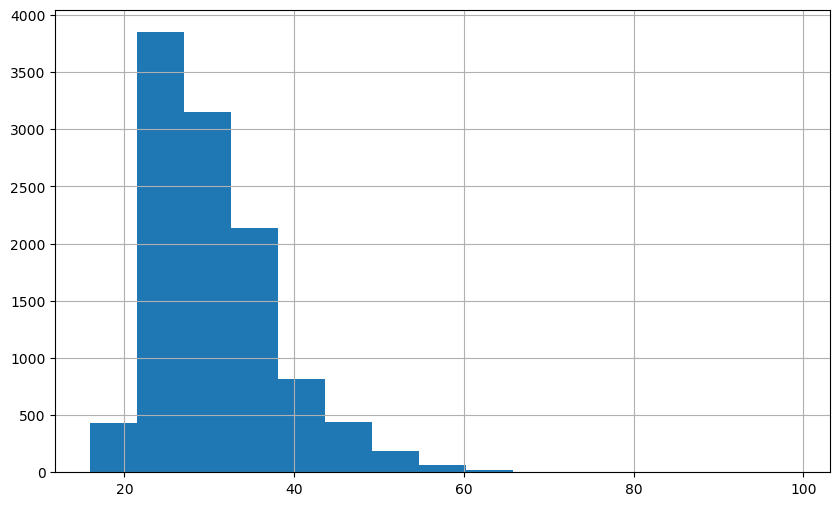

In [27]:
# your code goes here
df['Age'].hist(bins=15,figsize=(10,6))
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


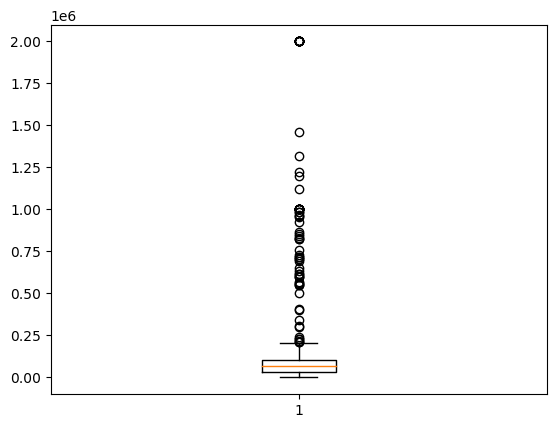

In [28]:
# your code goes here
age_info = df['Age'].describe()
IQR= age_info['75%']-age_info['25%']
df_box = df['ConvertedComp'].dropna().astype(float) # issue with null values
plt.boxplot(df_box)
plt.show()

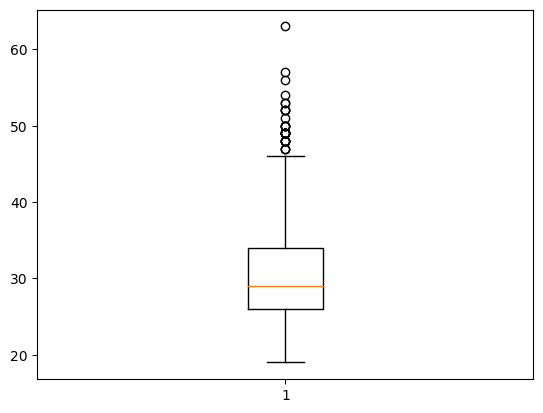

In [25]:
plt.boxplot(df['Age'])
plt.show()

In [53]:
df_box.head()

0     61000.0
1     95179.0
2     90000.0
3    455352.0
4     65277.0
Name: ConvertedComp, dtype: float64

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [13]:
# your code goes here
comp_info = df['ConvertedComp'].describe()
print(comp_info)
IQR1= comp_info['75%']-comp_info['25%']
print(IQR1)

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64
73132.0


Find out the upper and lower bounds.


In [50]:
# your code goes here
len(df['ConvertedComp'])

11398

Identify how many outliers are there in the `ConvertedComp` column.


In [54]:
# your code goes here
outlier = comp_info['max']+(IQR1*1.5)
Ouliers_count = (df['ConvertedComp']>outlier).sum()
outlier_below = comp_info['min']-(IQR1*1.5)
out_below_sum = (df['ConvertedComp']<outlier).sum()
total = Ouliers_count+out_below_sum
print(Ouliers_count)
print(total)

0
10582


In [55]:
outlier = comp_info['75%']+(IQR1*1.5)
outlier_below = comp_info['25%']-(IQR1*1.5)
Outliers_count = (df['ConvertedComp']>outlier).sum()
df_new1 = df.drop(df[df['ConvertedComp']>outlier].index)
new_mean = df_new1['ConvertedComp'].mean()
new_median = df_new1['ConvertedComp'].median()
og_median = df['ConvertedComp'].median()
print(Outliers_count)
print(outlier_below)
print(new_median)
print(og_median)
print(new_mean)

879
-82830.0
52704.0
57745.0
59883.20838915799


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [42]:
# your code goes here
df=df.dropna()
df_new = df.drop(df[df['ConvertedComp']>outlier].index)
og_size=len(df)
new_size = len(df_new1)
me=df_new1['ConvertedComp'].median()
new_mean = df_new1['ConvertedComp'].mean()
print(og_size)
print(new_size)
print(new_mean)

1008
937
67236.00960512273


<class 'NameError'>: name 'p' is not defined

In [18]:
!pip install seaborn

<class 'OSError'>: Not available

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


       CompTotal  ConvertedComp  WorkWeekHrs  CodeRevHrs   Age
6         3000.0        41244.0        140.0         1.0  38.0
15      156000.0       156000.0         50.0         3.0  42.0
17        6400.0        87996.0         39.0        10.0  43.0
36      700000.0       117540.0         45.0         5.0  22.0
47      155000.0         2169.0          6.0         4.0  29.0
...          ...            ...          ...         ...   ...
11320    71085.0        71085.0         40.0         2.0  39.0
11321    31000.0        35518.0         32.0         2.0  33.0
11324      800.0        11004.0         20.0         1.0  20.0
11345    90000.0        68705.0         40.0         2.0  46.0
11384    80000.0        58024.0         45.0         2.0  31.0

[937 rows x 5 columns]


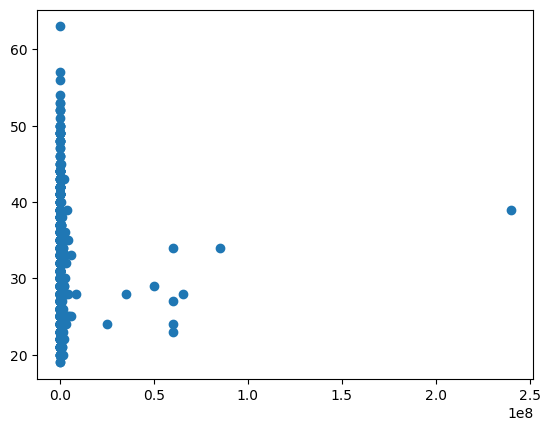

In [65]:
# your code goes here
num_columns= df_new.select_dtypes(include='float')
print(num_columns)
plt.scatter(x=df_new['CompTotal'],y=df_new['Age'])
plt.show()
#plt.scatter(x=df_new['Age'],y=df_new['Respondent'])
#plt.show()
#plt.scatter(x=df_new['Age'],y=df_new['CodeRevHrs'])
#plt.show()
#df_new['Age']= df['Age']
#df_new.plot(kind='line',x='Age',y='ConvertedComp')

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
